### **Examen de Certificación – Intento 3**

### **Fundamentos de Data Science**

Analizando la Rotación de Clientes en Telecomunicaciones

**Requisitos:**

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

El dataset puede ser encontrado aquí.

**Limpieza de datos con Python:**
* Identificar y solucionar cualquier valor duplicado.

* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

**Exploración de datos con Python:**

* Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

* Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

**Entrega:**

* Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.

* Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.

* NOTA: Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.

**Notas:**

* Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.

* Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.

* Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.

* Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) – PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA. Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. La falta de citas será considerada plagio y resultará en la falla del examen.

* No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.

* Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import re

In [2]:
path = '../data/WA_Fn_UseC_Telco_Customer_Churn.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Limpieza de datos con Python

### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [3]:
# Identificar duplicados
duplicados = df.duplicated()

# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Obtener la cantidad de filas y columnas
filas, columnas = df.shape

print(f'Cantidad de filas: {filas}')
print(f'Cantidad de columnas: {columnas}')

Cantidad de filas: 7043
Cantidad de columnas: 21


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### **Verificación y ajuste de tipos de datos**

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos

In [6]:
# Convertir columnas específicas a tipo 'category'
categorical_columns = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
df[categorical_columns] = df[categorical_columns].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [8]:
# Convertir la columna 'TotalCharges' a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [10]:
# Convertir customerID a tipo category
df['customerID'] = df['customerID'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### Consistencia en valores categóricos

Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [12]:
# Lista de columnas categóricas a revisar
categorical_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Ruta donde se guardará el archivo JSON
ruta_json = '../data/valores_unicos_iniciales.json'
# Guardar el diccionario en un archivo JSON
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"\nValores únicos guardados en '{ruta_json}'")


Valores únicos en la columna 'gender':
['Female', 'Male']

Valores únicos en la columna 'SeniorCitizen':
[0, 1]

Valores únicos en la columna 'Partner':
['Yes', 'No']

Valores únicos en la columna 'Dependents':
['No', 'Yes']

Valores únicos en la columna 'PhoneService':
['No', 'Yes']

Valores únicos en la columna 'MultipleLines':
['No phone service', 'No', 'Yes']

Valores únicos en la columna 'InternetService':
['DSL', 'Fiber optic', 'No']

Valores únicos en la columna 'OnlineSecurity':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'OnlineBackup':
['Yes', 'No', 'No internet service']

Valores únicos en la columna 'DeviceProtection':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'TechSupport':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'StreamingTV':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'StreamingMovies':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'Contract':
['Month-

In [13]:
def limpiar_cadena(cadena):
    """
    Limpia una cadena de texto realizando las siguientes operaciones:
    1. Convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última letra,
       pero mantiene los caracteres internos.
    
    Parámetros:
    - cadena (str): La cadena de texto a limpiar.
    
    Retorna:
    - str: La cadena limpia.
    """
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        
        # 2. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
        
        return cadena
    return cadena


# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)
# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())


Valores únicos después de limpieza en 'gender':
['female', 'male']
Categories (2, object): ['female', 'male']

Valores únicos después de limpieza en 'SeniorCitizen':
[0, 1]
Categories (2, int64): [0, 1]

Valores únicos después de limpieza en 'Partner':
['yes', 'no']
Categories (2, object): ['no', 'yes']

Valores únicos después de limpieza en 'Dependents':
['no', 'yes']
Categories (2, object): ['no', 'yes']

Valores únicos después de limpieza en 'PhoneService':
['no', 'yes']
Categories (2, object): ['no', 'yes']

Valores únicos después de limpieza en 'MultipleLines':
['no phone service', 'no', 'yes']
Categories (3, object): ['no', 'no phone service', 'yes']

Valores únicos después de limpieza en 'InternetService':
['dsl', 'fiber optic', 'no']
Categories (3, object): ['dsl', 'fiber optic', 'no']

Valores únicos después de limpieza en 'OnlineSecurity':
['no', 'yes', 'no internet service']
Categories (3, object): ['no', 'no internet service', 'yes']

Valores únicos después de limpieza en 

In [14]:
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()
    valores_unicos[col] = unique_vals
# Guardar en 'valores_unicos.json'
with open('../data/valores_unicos_finales.json', 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print("Valores únicos guardados en 'valores_unicos.json'.")

Valores únicos guardados en 'valores_unicos.json'.


### **Manejo de valores faltantes**

Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato

In [15]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
TotalCharges,7032,11,0.16
customerID,7043,0,0.00
DeviceProtection,7043,0,0.00
MonthlyCharges,7043,0,0.00
PaymentMethod,7043,0,0.00
PaperlessBilling,7043,0,0.00
Contract,7043,0,0.00
StreamingMovies,7043,0,0.00
StreamingTV,7043,0,0.00
TechSupport,7043,0,0.00


In [16]:
filas_con_nulos = df[df['TotalCharges'].isnull()]

# Mostrar las filas que tienen valores nulos en TotalCharges
print(filas_con_nulos)

      customerID  gender SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  female             0     yes        yes       0   
753   3115-CZMZD    male             0      no        yes       0   
936   5709-LVOEQ  female             0     yes        yes       0   
1082  4367-NUYAO    male             0     yes        yes       0   
1340  1371-DWPAZ  female             0     yes        yes       0   
3331  7644-OMVMY    male             0     yes        yes       0   
3826  3213-VVOLG    male             0     yes        yes       0   
4380  2520-SGTTA  female             0     yes        yes       0   
5218  2923-ARZLG    male             0     yes        yes       0   
6670  4075-WKNIU  female             0     yes        yes       0   
6754  2775-SEFEE    male             0      no        yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            no  no phone service             dsl                  yes  ...   
753      

In [17]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [18]:
# Rellenar valores nulos en la columna 'TotalCharges' con su media usando apply
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: x if pd.notnull(x) else df['TotalCharges'].mean())

In [19]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
customerID,7043,0,0.0
DeviceProtection,7043,0,0.0
TotalCharges,7043,0,0.0
MonthlyCharges,7043,0,0.0
PaymentMethod,7043,0,0.0
PaperlessBilling,7043,0,0.0
Contract,7043,0,0.0
StreamingMovies,7043,0,0.0
StreamingTV,7043,0,0.0
TechSupport,7043,0,0.0


### Detección de datos anómalos

Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

In [20]:
# Identificar filas con ventas negativas
sales_columns = ['tenure','MonthlyCharges', 'TotalCharges']
negative_sales = df[sales_columns] < 0
num_negative_sales = negative_sales.sum().sum()
print(f"Número total de ventas negativas: {num_negative_sales}")

Número total de ventas negativas: 0


In [21]:
# Obtener estadísticas descriptivas
stats = df[['MonthlyCharges', 'TotalCharges', 'tenure']].describe()
print(stats)

       MonthlyCharges  TotalCharges       tenure
count     7043.000000   7043.000000  7043.000000
mean        64.761692   2283.300441    32.371149
std         30.090047   2265.000258    24.559481
min         18.250000     18.800000     0.000000
25%         35.500000    402.225000     9.000000
50%         70.350000   1400.550000    29.000000
75%         89.850000   3786.600000    55.000000
max        118.750000   8684.800000    72.000000


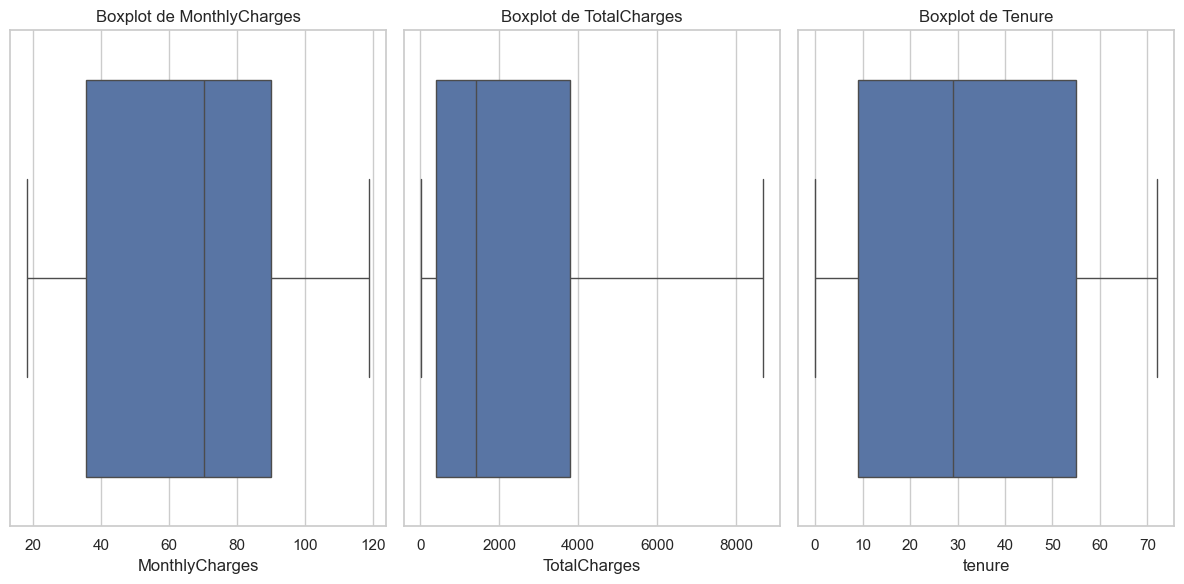

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo
sns.set(style="whitegrid")

# Crear boxplots para las columnas
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot de MonthlyCharges')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot de TotalCharges')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['tenure'])
plt.title('Boxplot de Tenure')

plt.tight_layout()
plt.show()


In [23]:
# Función para detectar anomalías utilizando el método IQR
def detect_anomalies_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detectar anomalías en cada columna
anomalies_monthly = detect_anomalies_iqr(df['MonthlyCharges'])
anomalies_total = detect_anomalies_iqr(df['TotalCharges'])
anomalies_tenure = detect_anomalies_iqr(df['tenure'])

print(f"Anomalías en MonthlyCharges: {anomalies_monthly}")
print(f"Anomalías en TotalCharges: {anomalies_total}")
print(f"Anomalías en Tenure: {anomalies_tenure}")


Anomalías en MonthlyCharges: Series([], Name: MonthlyCharges, dtype: float64)
Anomalías en TotalCharges: Series([], Name: TotalCharges, dtype: float64)
Anomalías en Tenure: Series([], Name: tenure, dtype: int64)


In [24]:
from scipy import stats

# Calcular Z-scores
z_scores = stats.zscore(df[['MonthlyCharges', 'TotalCharges', 'tenure']])

# Filtrar los valores atípicos
anomalies_z = (abs(z_scores) > 3).any(axis=1)

# Mostrar registros con anomalías
anomalous_records = df[anomalies_z]
print(anomalous_records)


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


## Exploración de datos con Python

Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


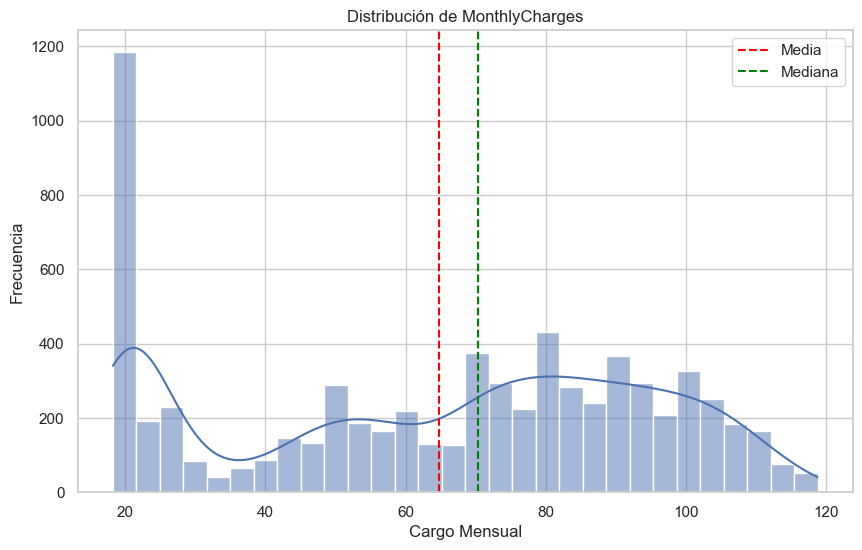

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un histograma para MonthlyCharges
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribución de MonthlyCharges')
plt.xlabel('Cargo Mensual')
plt.ylabel('Frecuencia')
plt.axvline(df['MonthlyCharges'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df['MonthlyCharges'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()


**Interpretación**

* El histograma muestra cómo se distribuyen los cargos mensuales. La mayoría de los clientes pagan entre 20 y 100, con un pico alrededor de 70. 

* La línea roja representa la media y la verde la mediana. 

* La curva KDE indica que la distribución no es del todo normal, ya que hay algunos clientes con cargos mucho más altos.
 


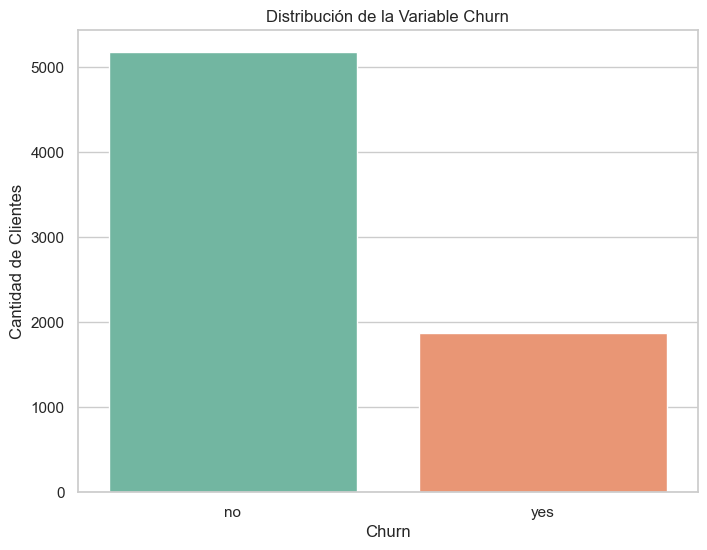

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Crear el gráfico de barras para la variable Churn
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)

# Agregar títulos y etiquetas
plt.title('Distribución de la Variable Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de Clientes')

# Mostrar el gráfico
plt.show()



**Interpretación**

* El gráfico de barras muestra que la mayoría de los clientes no han cancelado su servicio ('no'), mientras que un menor porcentaje sí lo ha hecho ('sí'). 

* Esto indica una alta retención de clientes, aunque sería bueno investigar más sobre quienes han cancelado.



Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. 

Cada visualización debe incluir una breve interpretación dentro del archivo de código.

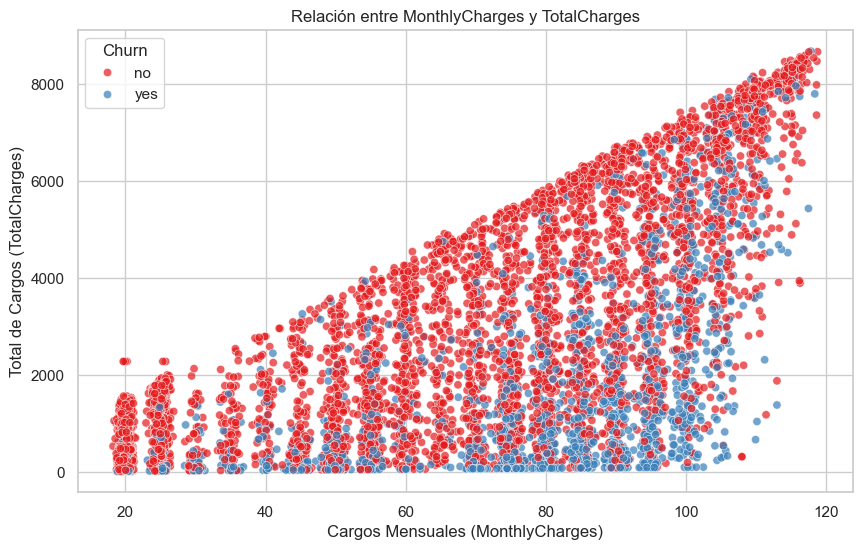

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='Set1', alpha=0.7)

# Agregar títulos y etiquetas
plt.title('Relación entre MonthlyCharges y TotalCharges')
plt.xlabel('Cargos Mensuales (MonthlyCharges)')
plt.ylabel('Total de Cargos (TotalCharges)')

# Mostrar el gráfico
plt.legend(title='Churn')
plt.show()


**Breve interpretación**

* Este gráfico de dispersión muestra la relación entre los cargos mensuales y el total de cargos, diferenciando por si el cliente ha cancelado su servicio.

* Aunque no todos los clientes con cargos altos han cancelado, parece que los que lo han hecho no están limitados a un rango específico de cargos totales. Esto indica que la decisión de cancelar no se basa únicamente en el monto total de los cargos.

C:\Users\user\AppData\Local\Temp\ipykernel_13732\4143271843.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn', loc='upper right')  # Mostrar leyenda si es necesario


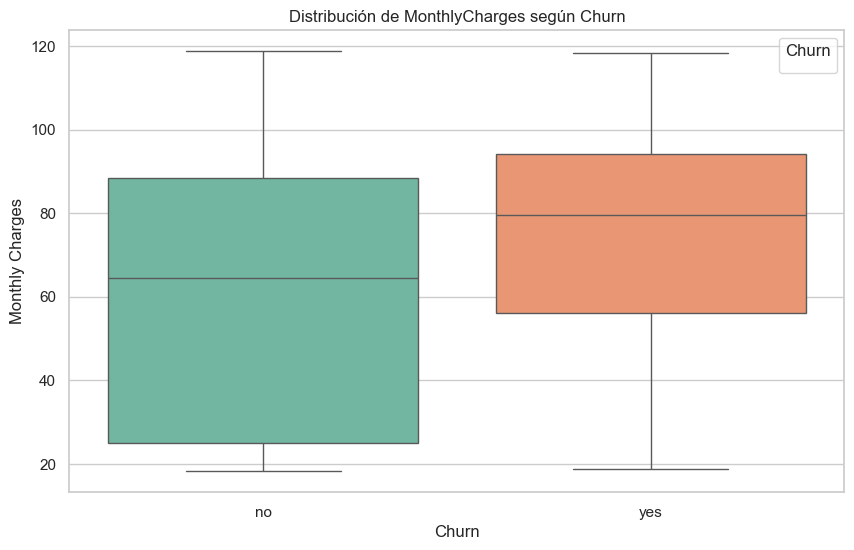

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de cajas para los cargos mensuales según el estado de Churn
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set2')

# Agregar títulos y etiquetas
plt.title('Distribución de MonthlyCharges según Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', loc='upper right')  # Mostrar leyenda si es necesario

# Mostrar el gráfico
plt.show()


**Interpretación**

Este gráfico de caja muestra cómo se distribuyen los cargos mensuales según el estado de Churn. Los clientes que no han cancelado (Churn = 'no') tienen cargos más bajos que los que sí han cancelado (Churn = 'sí'), lo que sugiere que los que tienen cargos más altos son más propensos a cancelar.



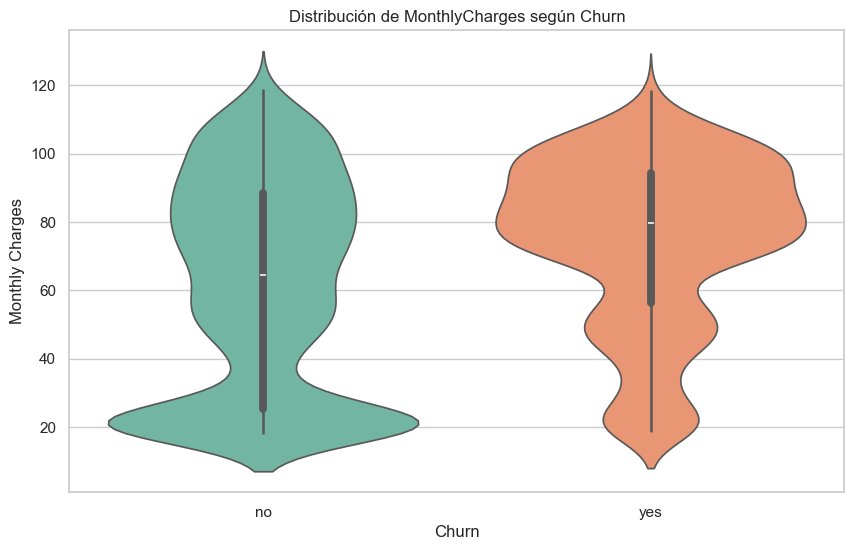

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set2', legend=False)

# Agregar título y etiquetas
plt.title('Distribución de MonthlyCharges según Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

# Mostrar el gráfico
plt.show()

**Interpretacion:**

Si el violín para los clientes que cancelaron es más ancho en los rangos altos de cargos, sugiere que estos clientes son más propensos a cancelar. Además, es clave tener en cuenta otros factores que pueden influir en la cancelación, como el tipo de servicio, la calidad de atención al cliente y las promociones.

**Diagrama de Dispersion**

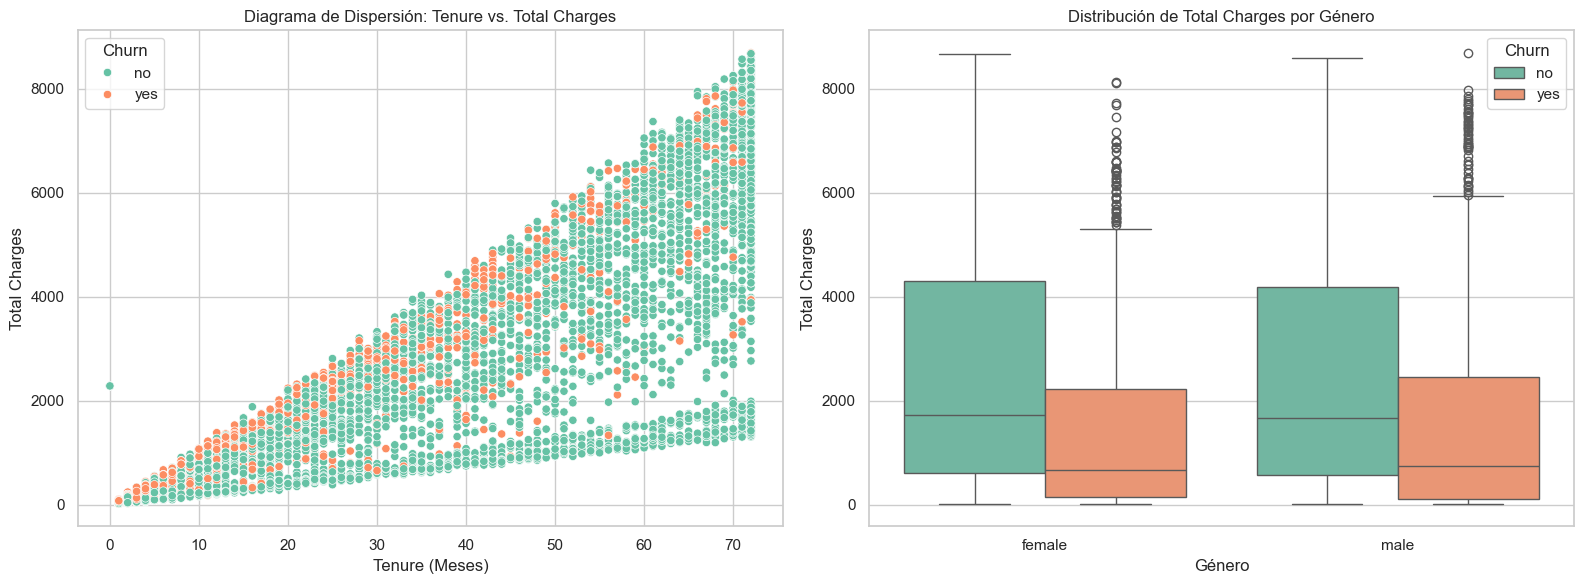

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear un objeto de figura y subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de dispersión: Tenure vs. TotalCharges
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', palette='Set2', ax=axs[0])
axs[0].set_title('Diagrama de Dispersión: Tenure vs. Total Charges')
axs[0].set_xlabel('Tenure (Meses)')
axs[0].set_ylabel('Total Charges')

# Gráfico de dispersión: Genre vs. TotalCharges
sns.boxplot(data=df, x='gender', y='TotalCharges', hue='Churn', palette='Set2', ax=axs[1])
axs[1].set_title('Distribución de Total Charges por Género')
axs[1].set_xlabel('Género')
axs[1].set_ylabel('Total Charges')

# Ajustar la leyenda y el diseño
axs[0].legend(title='Churn')
axs[1].legend(title='Churn', loc='upper right')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_13732\1346634747.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='Set2', ax=axs[1])
C:\Users\user\AppData\Local\Temp\ipykernel_13732\1346634747.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(title='Churn', loc='upper right')


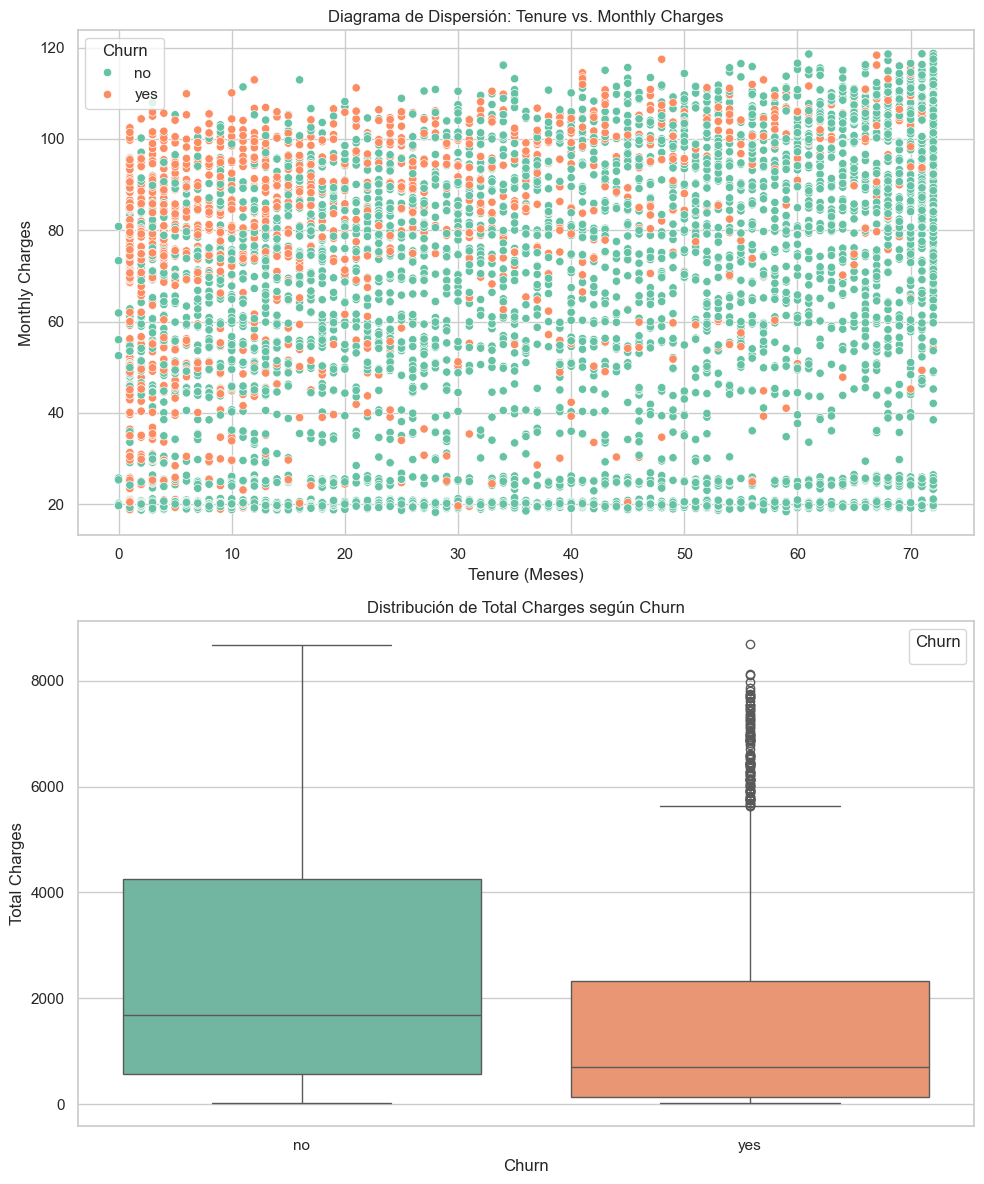

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear un objeto de figura y subplots verticales
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Gráfico de dispersión: Tenure vs. MonthlyCharges
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='Set2', ax=axs[0])
axs[0].set_title('Diagrama de Dispersión: Tenure vs. Monthly Charges')
axs[0].set_xlabel('Tenure (Meses)')
axs[0].set_ylabel('Monthly Charges')

# Boxplot: TotalCharges según Churn
sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='Set2', ax=axs[1])
axs[1].set_title('Distribución de Total Charges según Churn')
axs[1].set_xlabel('Churn')
axs[1].set_ylabel('Total Charges')

# Ajustar la leyenda y el diseño
axs[0].legend(title='Churn')
axs[1].legend(title='Churn', loc='upper right')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [32]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Número de registros con Total Charges > 5000: 1135


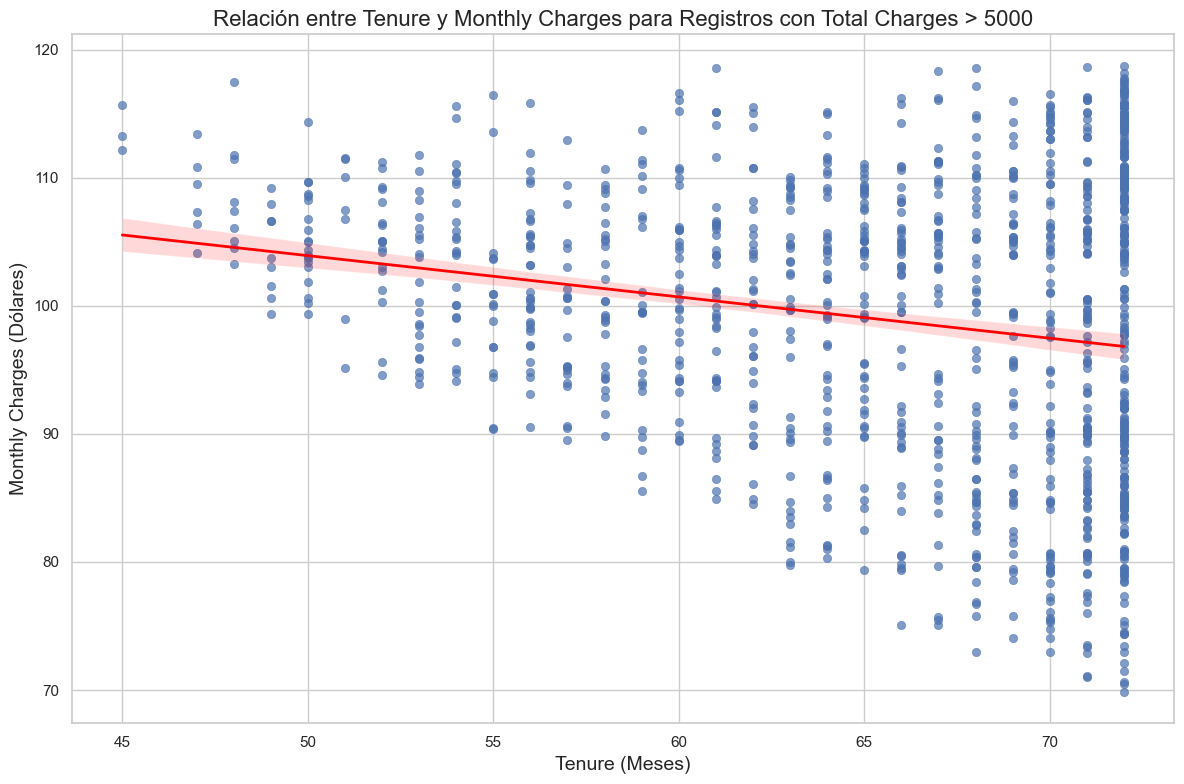

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo de DataFrame (asegúrate de que el DataFrame 'df' está definido)
# df = pd.read_csv('ruta/a/tu/dataset.csv')  # Carga tu DataFrame

# Definir el umbral de ventas
umbral_ventas = 5000  # Ajusta este valor según lo que consideres

# Filtrar los registros que han vendido más que el umbral
df_filtrado = df[df['TotalCharges'] > umbral_ventas]

# Mostrar cuántos registros cumplen con el criterio
print(f"Número de registros con Total Charges > {umbral_ventas}: {df_filtrado.shape[0]}")

# Preparar los datos para el diagrama de dispersión
df_scatter = df_filtrado[['tenure', 'MonthlyCharges']].dropna()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x='tenure',
    y='MonthlyCharges',
    data=df_scatter,
    alpha=0.7,            # Transparencia de los puntos
    edgecolor=None        # Sin borde en los puntos
)

# Añadir una línea de regresión
sns.regplot(
    x='tenure',
    y='MonthlyCharges',
    data=df_scatter,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)

# Añadir títulos y etiquetas
plt.title('Relación entre Tenure y Monthly Charges para Registros con Total Charges > 5000', fontsize=16)
plt.xlabel('Tenure (Meses)', fontsize=14)
plt.ylabel('Monthly Charges (Dólares)', fontsize=14)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Número de clientes con tenure < 12 meses: 2069


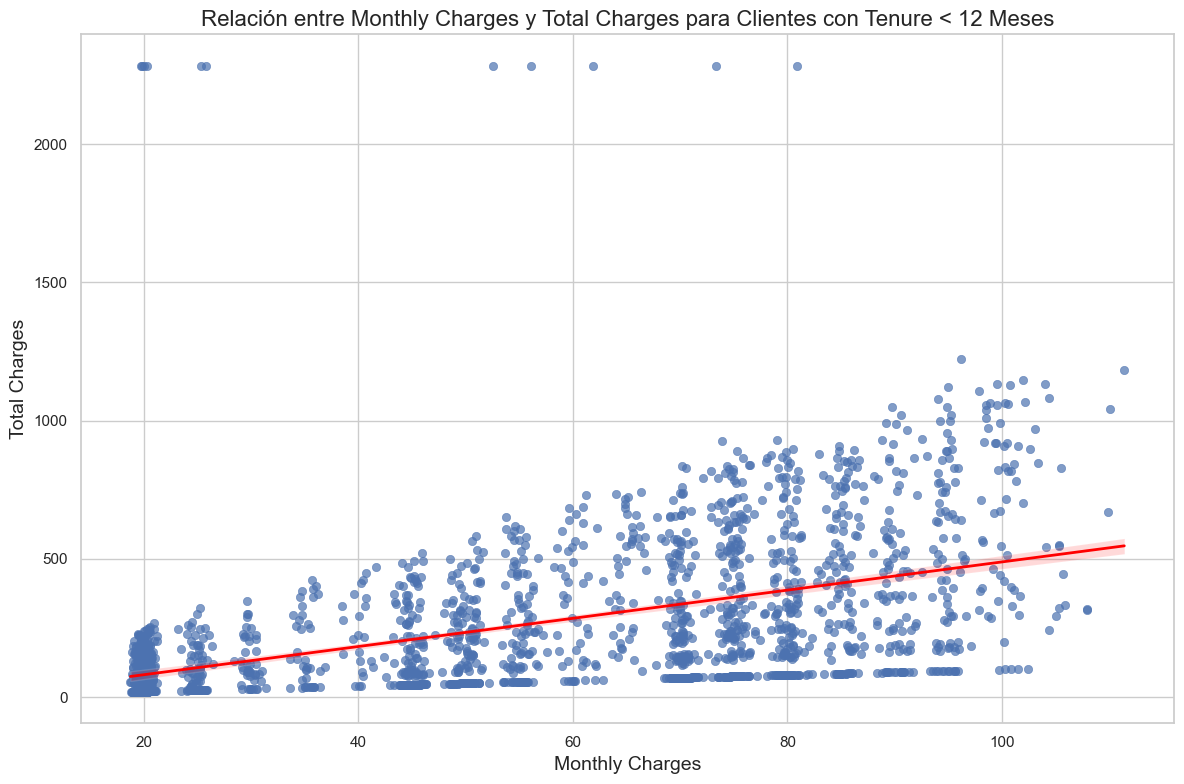

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el umbral de tenure
umbral_tenure = 12  # Por ejemplo, clientes con menos de 12 meses

# Filtrar los clientes que han estado menos de 12 meses
df_filtrado = df[df['tenure'] < umbral_tenure]

# Mostrar cuántos clientes cumplen con el criterio
print(f"Número de clientes con tenure < {umbral_tenure} meses: {df_filtrado.shape[0]}")

# Preparar datos para el diagrama de dispersión
df_scatter = df_filtrado[['MonthlyCharges', 'TotalCharges']].dropna()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x='MonthlyCharges',
    y='TotalCharges',
    data=df_scatter,
    alpha=0.7,            # Transparencia de los puntos
    edgecolor=None        # Sin borde en los puntos
)

# Añadir una línea de regresión
sns.regplot(
    x='MonthlyCharges',
    y='TotalCharges',
    data=df_scatter,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)

# Añadir títulos y etiquetas
plt.title('Relación entre Monthly Charges y Total Charges para Clientes con Tenure < 12 Meses', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=14)
plt.ylabel('Total Charges', fontsize=14)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**Interpretacion**

**Diagrama de dispersión (Tenure vs. Monthly Charges):** Los clientes con más tiempo en el servicio muestran una variedad de cargos mensuales. Aquellos que han cancelado suelen tener cargos más altos, lo que sugiere que los clientes que pagan más podrían estar insatisfechos.

**Boxplot (Total Charges según Churn):** Los clientes que no cancelan tienen cargos totales más bajos que los que sí lo hacen. Esto sugiere que los gastos más altos pueden generar insatisfacción y llevar a la cancelación del servicio.


## **Análisis adicional**

#### Estadísticas descriptivas

Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

In [35]:
# Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas identificadas:")
print(columnas_numericas)


Columnas numéricas identificadas:
['tenure', 'MonthlyCharges', 'TotalCharges']


In [36]:
def calcular_estadisticas(column, data):
    """
    Calcula estadísticas descriptivas para una columna numérica,
    omitiendo los valores nulos.

    Parámetros:
    - column (str): Nombre de la columna.
    - data (pd.Series): Serie de pandas con los datos de la columna.

    Retorna:
    - dict: Diccionario con las estadísticas calculadas.
    """
    estadisticas = {
        'Cuenta': int(np.sum(~np.isnan(data))),
        'Media': np.nanmean(data),
        'Mediana': np.nanmedian(data),
        'Desviación Estándar': np.nanstd(data, ddof=1),
        'Mínimo': np.nanmin(data),
        'Máximo': np.nanmax(data),
        '25% Percentil': np.nanpercentile(data, 25),
        '75% Percentil': np.nanpercentile(data, 75)
    }
    return estadisticas

# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in columnas_numericas:
    datos_columna = df[columna].values
    estadisticas = calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
tenure,7043.0,32.37,29.00,24.56,0.00,72.00,9.00,55.00
MonthlyCharges,7043.0,64.76,70.35,30.09,18.25,118.75,35.50,89.85
TotalCharges,7043.0,2283.30,1400.55,2265.00,18.80,8684.80,402.22,3786.60


#### Análisis de correlación

Identifica y analiza las correlaciones más fuertes entre las variables del dataset.

In [37]:
# Calcular la matriz de correlación utilizando Pearson
matriz_correlacion = df[columnas_numericas].corr(method='pearson')
# Mostrar la matriz de correlación
print("\nMatriz de Correlación (Pearson):")
matriz_correlacion


Matriz de Correlación (Pearson):


,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


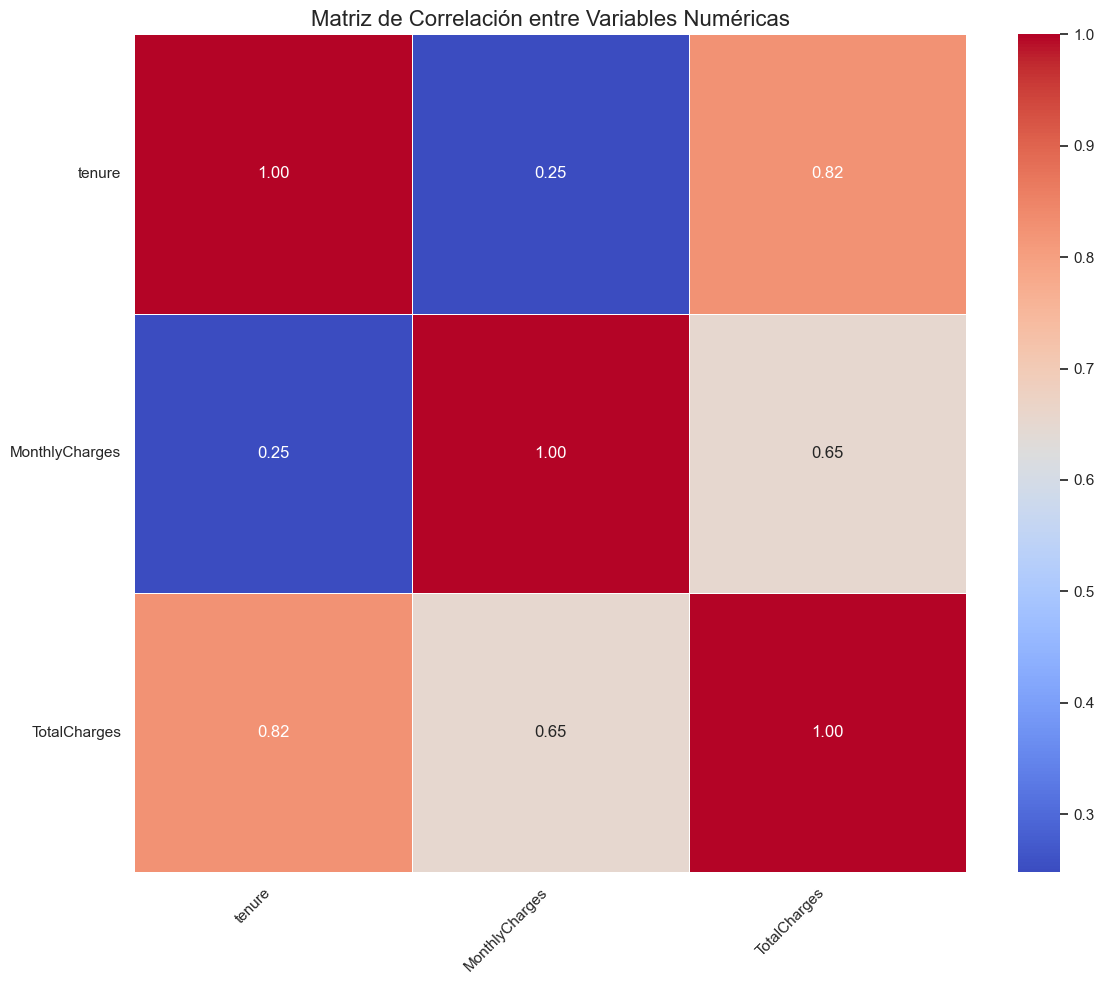

In [38]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))
# Crear el heatmap utilizando seaborn
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# Añadir títulos y etiquetas
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13732\20511046.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_churn_data = df.groupby(['PaymentMethod', 'Churn']).size().unstack()


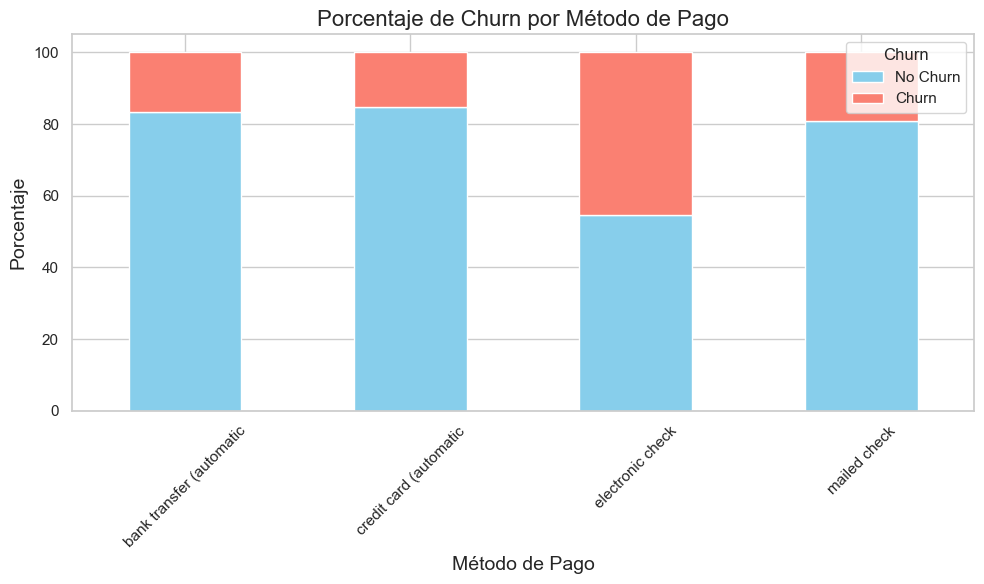

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupamos los datos por PaymentMethod y Churn para contar la cantidad de clientes
payment_churn_data = df.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Calculamos el porcentaje de cancelación para cada método de pago
payment_churn_percentage = payment_churn_data.div(payment_churn_data.sum(axis=1), axis=0) * 100

# Crear gráfico de barras apiladas para mostrar el porcentaje de cancelación
payment_churn_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))

# Configuración de títulos y etiquetas
plt.title('Porcentaje de Churn por Método de Pago', fontsize=16)
plt.xlabel('Método de Pago', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.legend(title='Churn', labels=['No Churn', 'Churn'], loc='upper right')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
### Agregado para poder hacer un gitadd .